In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import PIL
import os
import pathlib
from collections import defaultdict

DATA_FOLDER = "./data/food201/"
FOOD_101_FOLDER = "/home/hatsunemiku/dev/food101-semi/data/food-101/images/"

In [2]:
def dataset_stats(df):
    print('Dataset shape: ', df.shape)
    print('Columns: ', df.columns)
    print('Head: \n', df.head())

In [3]:
def extract_segmented_pictures(df, dataset_type):
    """
    Copies the 10_000 segmented images from Food101 that contains total > 100_000 pictures.
    """
    image_folder = f"{DATA_FOLDER}images_{dataset_type}/"
    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        if not os.path.exists(image_folder + food_folder):
            os.makedirs(image_folder + food_folder)
        try:
            os.rename(FOOD_101_FOLDER + filename, image_folder + filename)
        except:
            print(f"Could not copy file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [4]:
def prepare_image_dataset(dataset_type):
    """
    Parses and finds images for given `dataset_type`: {test, train}.
    """
    df = pd.read_csv(DATA_FOLDER + dataset_type + "_multilabel.csv", header=None, names=['all'])

    dataset_stats(df)

    df['file'] = df['all'].apply(lambda x: x.split(' ')[0])
    df['ids'] = df['all'].apply(lambda x: x.split(' ')[1:])
    df.drop(columns=["all"], inplace=True)
    dataset_stats(df)
    
    # DONE ALREADY
    # extract_segmented_pictures(df, dataset_type)
    return df

In [5]:
df_labels = pd.read_csv(DATA_FOLDER + "multilabel_map.csv", header=None, names=["id", "food"])

In [6]:
dataset_stats(df_labels)


Dataset shape:  (201, 2)
Columns:  Index(['id', 'food'], dtype='object')
Head: 
    id       food
0   0  apple pie
1   1    arugula
2   2  asparagus
3   3     au jus
4   4    avocado


In [7]:
MAX_ID = df_labels["id"].max()
MAX_ID

200

In [8]:
df_train = prepare_image_dataset('train')


Dataset shape:  (35242, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                 all
0          omelette/3532836.jpg 134
1  frozen_yogurt/3667619.jpg 88 183
2            paella/3673967.jpg 140
3   baby_back_ribs/3781340.jpg 5 69
4         creme_brulee/82255.jpg 63
Dataset shape:  (35242, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                          file        ids
0        omelette/3532836.jpg      [134]
1   frozen_yogurt/3667619.jpg  [88, 183]
2          paella/3673967.jpg      [140]
3  baby_back_ribs/3781340.jpg    [5, 69]
4      creme_brulee/82255.jpg       [63]
================== START ==================
Copied 0 / 35242 files
Copied 1000 / 35242 files
Copied 2000 / 35242 files
Copied 3000 / 35242 files
Copied 4000 / 35242 files
Copied 5000 / 35242 files
Copied 6000 / 35242 files
Copied 7000 / 35242 files
Copied 8000 / 35242 files
Copied 9000 / 35242 files
Copied 10000 / 35242 files
Copied 11000 / 35242 files
Copied 12000 / 35242 fi

In [9]:
df_test = prepare_image_dataset('test')


Dataset shape:  (15132, 1)
Columns:  Index(['all'], dtype='object')
Head: 
                                        all
0  strawberry_shortcake/837744.jpg 184 199
1      pork_chop/540470.jpg 163 193 152 66
2              clam_chowder/2762472.jpg 54
3           baby_back_ribs/543585.jpg 5 81
4     lobster_roll_sandwich/670381.jpg 118
Dataset shape:  (15132, 2)
Columns:  Index(['file', 'ids'], dtype='object')
Head: 
                                file                  ids
0   strawberry_shortcake/837744.jpg           [184, 199]
1              pork_chop/540470.jpg  [163, 193, 152, 66]
2          clam_chowder/2762472.jpg                 [54]
3         baby_back_ribs/543585.jpg              [5, 81]
4  lobster_roll_sandwich/670381.jpg                [118]
================== START ==================
Copied 0 / 15132 files
Copied 1000 / 15132 files
Copied 2000 / 15132 files
Copied 3000 / 15132 files
Copied 4000 / 15132 files
Copied 5000 / 15132 files
Copied 6000 / 15132 files
Copied 7000 / 151

In [10]:
test_images_dir = pathlib.Path(DATA_FOLDER + 'images_test/')
train_images_dir = pathlib.Path(DATA_FOLDER + 'images_train/')

In [11]:
train_count = len(list(train_images_dir.glob('*/*.jpg')))
print(f'Train images: {train_count}')

test_count = len(list(test_images_dir.glob('*/*.jpg')))
print(f'Test images: {test_count}')

Train images: 35242
Test images: 15132


In [12]:
test_image_sizes = defaultdict(int)

for img in test_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_images_dir.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [13]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 9418
Size (512, 384) 2235
Size (384, 512) 1021
Size (382, 512) 411
Size (512, 382) 383
Size (512, 341) 200
Size (512, 288) 153
Size (512, 306) 126
Size (512, 289) 121
Size (512, 383) 82
Size (306, 512) 71
Size (512, 342) 56
Size (512, 340) 52
Size (511, 512) 51
Size (288, 512) 50
Size (512, 307) 46
Size (289, 512) 39
Size (383, 512) 39
Size (512, 287) 35
Size (512, 511) 34
Size (341, 512) 30
Size (512, 343) 26
Size (512, 339) 23
Size (512, 385) 19
Size (287, 512) 15
Size (307, 512) 10
Size (512, 500) 10


In [14]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 21714
Size (512, 384) 5165
Size (384, 512) 2337
Size (382, 512) 925
Size (512, 382) 912
Size (512, 341) 484
Size (512, 288) 365
Size (512, 306) 345
Size (512, 289) 281
Size (512, 383) 214
Size (306, 512) 167
Size (511, 512) 156
Size (512, 340) 154
Size (512, 307) 126
Size (288, 512) 119
Size (512, 342) 116
Size (383, 512) 111
Size (341, 512) 97
Size (512, 287) 89
Size (512, 511) 85
Size (289, 512) 75
Size (512, 343) 59
Size (512, 339) 56
Size (307, 512) 47
Size (512, 509) 41
Size (512, 385) 34
Size (512, 308) 22
Size (512, 471) 21
Size (512, 500) 20
Size (512, 508) 19
Size (287, 512) 18
Size (512, 410) 15
Size (342, 512) 15
Size (512, 366) 14
Size (512, 510) 14
Size (512, 386) 13
Size (512, 304) 13
Size (410, 512) 12
Size (340, 512) 12
Size (512, 381) 11
Size (512, 344) 11
Size (385, 512) 11
Size (512, 499) 10


In [15]:
def extract_masks(df, dataset_type):
    """
    Split the masks into train / test sets and removes any image without mask.
    """
    mask_folder = f"{DATA_FOLDER}masks_{dataset_type}/"

    total = df.shape[0]
    print("================== START ==================")
    for i in range(total):
        filename = df.loc[i, "file"]
        food_folder = filename.split('/')[0]
        filename_png = filename.split('.')[0] + '.png'

        if not os.path.exists(mask_folder + food_folder):
            os.makedirs(mask_folder + food_folder)
        try:
            os.rename(DATA_FOLDER + 'pixel_annotations/' + filename_png, mask_folder + filename_png)
        except:
            print(f"Could not find mask for file: {filename}")
        if i % 1000 == 0:
            print(f"Copied {i} / {total} files")

    print("================== DONE ==================")

In [16]:
extract_masks(df_test, 'test')


================== START ==================
Could not find mask for file: strawberry_shortcake/837744.jpg
Copied 0 / 15132 files
Could not find mask for file: pork_chop/540470.jpg
Could not find mask for file: clam_chowder/2762472.jpg
Could not find mask for file: baby_back_ribs/543585.jpg
Could not find mask for file: ice_cream/2998712.jpg
Could not find mask for file: beet_salad/347874.jpg
Could not find mask for file: sushi/780283.jpg
Could not find mask for file: carrot_cake/2902801.jpg
Could not find mask for file: dumplings/882708.jpg
Could not find mask for file: bibimbap/562370.jpg
Could not find mask for file: onion_rings/2668349.jpg
Could not find mask for file: macarons/492902.jpg
Could not find mask for file: paella/2464951.jpg
Could not find mask for file: seaweed_salad/3265901.jpg
Could not find mask for file: croque_madame/377143.jpg
Could not find mask for file: cheese_plate/3910057.jpg
Could not find mask for file: tuna_tartare/3737722.jpg
Could not find mask for file:

In [17]:
extract_masks(df_train, 'train')


================== START ==================
Could not find mask for file: omelette/3532836.jpg
Copied 0 / 35242 files
Could not find mask for file: paella/3673967.jpg
Could not find mask for file: baby_back_ribs/3781340.jpg
Could not find mask for file: creme_brulee/82255.jpg
Could not find mask for file: cheese_plate/3401246.jpg
Could not find mask for file: macaroni_and_cheese/397066.jpg
Could not find mask for file: fried_rice/480064.jpg
Could not find mask for file: takoyaki/822322.jpg
Could not find mask for file: macaroni_and_cheese/3803409.jpg
Could not find mask for file: french_fries/3285020.jpg
Could not find mask for file: creme_brulee/763564.jpg
Could not find mask for file: miso_soup/74615.jpg
Could not find mask for file: apple_pie/3410227.jpg
Could not find mask for file: deviled_eggs/453102.jpg
Could not find mask for file: oysters/3000868.jpg
Could not find mask for file: peking_duck/340118.jpg
Could not find mask for file: spaghetti_carbonara/2800356.jpg
Could not fin

In [18]:
test_masks = pathlib.Path(DATA_FOLDER + 'masks_test/')
train_masks = pathlib.Path(DATA_FOLDER + 'masks_train/')

In [19]:
print(f"Tests images with mask: {len(list(test_masks.glob('*/*.png')))}")
print(f"Train images with mask: {len(list(train_masks.glob('*/*.png')))}")

Tests images with mask: 2439
Train images with mask: 9654


In [26]:
def extract_segmented(dataset_type):
    """
    Removes all test / train images without a mask.
    """
    mask_folder = pathlib.Path(f"{DATA_FOLDER}masks_{dataset_type}/")
    image_folder = pathlib.Path(f"{DATA_FOLDER}images_{dataset_type}")
    new_image_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    removed = 0
    total = 0

    print("================== START ==================")
    for mask in mask_folder.glob('*/*'):
        # Map to jpeg file.
        print(mask)
        filefolder = str(mask).split('/')[-2]
        filename = filefolder + '/' + str(mask).split('/')[-1].split('.')[0] + '.jpg'
        filepath = image_folder / filename
        newpath = new_image_folder / filename

        if not os.path.exists(new_image_folder / filefolder):
            os.makedirs(new_image_folder / filefolder)

        os.replace(filepath, newpath)
        total += 1
    
    print(f"Removed {total} files")
    print("================== DONE ==================")

In [27]:
extract_segmented('test')

================== START ==================
data/food201/masks_test/chicken_quesadilla/2918136.png
data/food201/masks_test/chicken_quesadilla/2861172.png
data/food201/masks_test/chicken_quesadilla/2761578.png
data/food201/masks_test/chicken_quesadilla/2942490.png
data/food201/masks_test/chicken_quesadilla/605279.png
data/food201/masks_test/chicken_quesadilla/2742303.png
data/food201/masks_test/chicken_quesadilla/3856227.png
data/food201/masks_test/chicken_quesadilla/3830713.png
data/food201/masks_test/chicken_quesadilla/3319078.png
data/food201/masks_test/chicken_quesadilla/703180.png
data/food201/masks_test/chicken_quesadilla/404193.png
data/food201/masks_test/chicken_quesadilla/9290.png
data/food201/masks_test/chicken_quesadilla/2807010.png
data/food201/masks_test/chicken_quesadilla/268471.png
data/food201/masks_test/chicken_quesadilla/535327.png
data/food201/masks_test/chicken_quesadilla/2560042.png
data/food201/masks_test/chicken_quesadilla/3282314.png
data/food201/masks_test/chick

In [28]:
extract_segmented('train')

================== START ==================
data/food201/masks_train/chicken_quesadilla/3724134.png
data/food201/masks_train/chicken_quesadilla/440384.png
data/food201/masks_train/chicken_quesadilla/3091337.png
data/food201/masks_train/chicken_quesadilla/711089.png
data/food201/masks_train/chicken_quesadilla/3466414.png
data/food201/masks_train/chicken_quesadilla/3419690.png
data/food201/masks_train/chicken_quesadilla/386047.png
data/food201/masks_train/chicken_quesadilla/972182.png
data/food201/masks_train/chicken_quesadilla/3304558.png
data/food201/masks_train/chicken_quesadilla/3083828.png
data/food201/masks_train/chicken_quesadilla/66288.png
data/food201/masks_train/chicken_quesadilla/659503.png
data/food201/masks_train/chicken_quesadilla/3784496.png
data/food201/masks_train/chicken_quesadilla/3468778.png
data/food201/masks_train/chicken_quesadilla/873901.png
data/food201/masks_train/chicken_quesadilla/3342542.png
data/food201/masks_train/chicken_quesadilla/507160.png
data/food201/

In [29]:
test_s = pathlib.Path(DATA_FOLDER + 'segmented_test/')
train_s = pathlib.Path(DATA_FOLDER + 'segmented_train/')

print(f"Tests images with mask: {len(list(test_s.glob('*/*.jpg')))}")
print(f"Train images with mask: {len(list(train_s.glob('*/*.jpg')))}")

Tests images with mask: 2439
Train images with mask: 9654


In [31]:
df_test["present"] = False
df_train["present"] = False

In [36]:
def remove_unused_entries(df, dataset_type):
    """
    Removes all entries that don't have segmented image.
    """
    segmented_folder = pathlib.Path(f"{DATA_FOLDER}segmented_{dataset_type}")

    for image in segmented_folder.glob('*/*'):
        filename = ('/').join(str(image).split('/')[-2:])
        df.loc[df['file'] == filename, 'present'] = True

In [37]:
remove_unused_entries(df_test, 'test')


In [38]:
df_test['present'].value_counts()


False    12693
True      2439
Name: present, dtype: int64

In [39]:
remove_unused_entries(df_train, 'train')
df_train['present'].value_counts()


False    25588
True      9654
Name: present, dtype: int64

In [40]:
df_test = df_test[df_test["present"] == True]
df_test.drop(columns=["present"], inplace=True)
df_test.shape

(2439, 2)

In [41]:
df_train = df_train[df_train["present"] == True]
df_train.drop(columns=["present"], inplace=True)
df_train.shape

(9654, 2)

In [42]:
df_train_stored = df_train
df_test_stored = df_test

%store df_train_stored
%store df_test_stored

Stored 'df_train_stored' (DataFrame)
Stored 'df_test_stored' (DataFrame)


In [43]:
df_train.to_csv('train_images_101_labels.csv')
df_test.to_csv('test_images_101_labels.csv')

In [44]:
test_image_sizes = defaultdict(int)

for img in test_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    test_image_sizes[image.size] += 1

train_image_sizes = defaultdict(int)

for img in train_s.glob('*/*.jpg'):
    image = PIL.Image.open(str(img))
    train_image_sizes[image.size] += 1

In [45]:
for size, count in sorted(test_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")

Size (512, 512) 1514
Size (512, 384) 365
Size (384, 512) 173
Size (382, 512) 66
Size (512, 382) 61
Size (512, 288) 27
Size (512, 341) 26
Size (512, 306) 22
Size (512, 289) 20
Size (306, 512) 14
Size (512, 342) 11


In [46]:
for size, count in sorted(train_image_sizes.items(), key=lambda x: x[1], reverse=True):
    if count < 10:
        break
    print(f"Size {size} {count}")


Size (512, 512) 5969
Size (512, 384) 1397
Size (384, 512) 634
Size (382, 512) 258
Size (512, 382) 249
Size (512, 341) 151
Size (512, 288) 112
Size (512, 289) 92
Size (512, 306) 84
Size (306, 512) 46
Size (512, 383) 46
Size (512, 340) 43
Size (512, 307) 40
Size (511, 512) 39
Size (288, 512) 34
Size (512, 342) 31
Size (383, 512) 26
Size (512, 287) 22
Size (289, 512) 21
Size (341, 512) 20
Size (307, 512) 17
Size (512, 509) 17
Size (512, 511) 17
Size (512, 339) 14
Size (512, 343) 12


In [48]:
def food_frequency(df):
    food_ids = np.concatenate(df["ids"].values)
    food_ids_u, food_ids_c = np.unique(food_ids, return_counts=True)
    foods = []

    food_ids_u, food_ids_c = zip(*sorted(zip(food_ids_u, food_ids_c), key=lambda x: x[1]))

    for food_id, count in zip(food_ids_u, food_ids_c):
        food = df_labels.loc[int(food_id), "food"]
        foods.append(food)

        print(f"[{food_id:>3}] {food:25} {count}")

    # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,100))
    # ax.barh(y=range(len(foods)), width=food_ids_c, tick_label=foods, align='center', color=['y', 'b'])

In [49]:
food_frequency(df_train)


[ 20] black beans               15
[ 28] bun                       15
[  3] au jus                    15
[192] tomato sauce              17
[ 53] cilantro                  19
[125] mixed greens              21
[129] mustard                   21
[ 21] blackberries              21
[200] wine                      22
[ 48] chocolate                 22
[ 65] croutons                  22
[170] sausage                   23
[ 87] frosting                  23
[ 47] chives                    24
[ 91] ginger                    24
[143] parmesan cheese           25
[ 15] beer                      25
[ 18] berries                   25
[147] peppers                   26
[ 43] chicken                   26
[175] soup                      27
[194] tortilla                  27
[  9] basil                     27
[103] ham                       28
[ 32] cake                      28
[ 30] cabbage                   30
[ 56] cocktail sauce            30
[ 62] cream                     30
[  1] arugula       

In [50]:
food_frequency(df_test)


[ 18] berries                   3
[  3] au jus                    3
[ 30] cabbage                   3
[ 32] cake                      3
[ 20] black beans               4
[ 87] frosting                  4
[ 90] garnish                   4
[ 12] beef                      5
[127] mushrooms                 5
[131] noodles                   5
[147] peppers                   5
[ 48] chocolate                 5
[ 91] ginger                    5
[ 56] cocktail sauce            6
[ 93] grapes                    6
[ 11] beans                     7
[132] nuts                      7
[175] soup                      7
[200] wine                      7
[ 43] chicken                   7
[ 53] cilantro                  7
[ 85] fried egg                 7
[122] mint                      8
[ 21] blackberries              8
[  4] avocado                   8
[145] peas                      9
[170] sausage                   9
[194] tortilla                  9
[ 47] chives                    9
[ 62] cream   

In [51]:
food_ids_test = np.concatenate(df_test["ids"].values)
food_ids_test_u, food_ids_test_c = np.unique(food_ids_test, return_counts=True)

food_ids_train = np.concatenate(df_train["ids"].values)
food_ids_train_u, food_ids_train_c = np.unique(food_ids_train, return_counts=True)

food_ids_test_u, food_ids_test_c = zip(*sorted(zip(food_ids_test_u, food_ids_test_c), key=lambda x: x[0]))
food_ids_train_u, food_ids_train_c = zip(*sorted(zip(food_ids_train_u, food_ids_train_c), key=lambda x: x[0]))

food_id = 0
index_test = 0
index_train = 0

abundancy_ratios = []

while food_id <= MAX_ID:

    id_train = food_ids_train_u[index_train]
    id_test = food_ids_test_u[index_test]

    food = df_labels.loc[int(food_id), "food"]

    if id_train == id_test:
        count_train = food_ids_train_c[index_train]
        count_test = food_ids_test_c[index_test]

        ratio = count_train / count_test
        abundancy_ratios.append(ratio)

        print(f"[{food_id:>3}] {food:25} {count_train:4d} {count_train / df_train.shape[0]:.2f} {count_test:4d} {count_test / df_test.shape[0]:.2f}  {ratio:.2f}")
        index_train += 1
        index_test += 1

    elif id_train > id_test:
        print(f"[{food_id:>3}] {food:25} {count_test:4d} ONLY IN TEST SET")
        index_test += 1
    elif id_train < id_test:
        print(f"[{food_id:>3}] {food:25} {count_train:4d} ONLY IN TRAIN SET")
        index_train += 1

    food_id += 1

[  0] apple pie                  108 0.01   28 0.01  3.86
[  1] arugula                     31 0.00   14 0.01  2.21
[  2] asparagus                   54 0.01   16 0.01  3.38
[  3] au jus                     107 0.01   22 0.01  4.86
[  4] avocado                    189 0.02   52 0.02  3.63
[  5] baby back ribs             100 0.01   32 0.01  3.12
[  6] bacon                       28 0.00   17 0.01  1.65
[  7] baked potato               113 0.01   29 0.01  3.90
[  8] baklava                     53 0.01   11 0.00  4.82
[  9] basil                       41 0.00   14 0.01  2.93
[ 10] bean sprouts               104 0.01   28 0.01  3.71
[ 11] beans                       96 0.01   29 0.01  3.31
[ 12] beef                        84 0.01   28 0.01  3.00
[ 13] beef carpaccio              45 0.00    7 0.00  6.43
[ 14] beef tartare               100 0.01   25 0.01  4.00
[ 15] beer                       226 0.02   48 0.02  4.71
[ 16] beet salad                 120 0.01   35 0.01  3.43
[ 17] beignets

(array([ 3.,  2.,  1.,  1.,  3.,  4.,  6.,  4., 10.,  8.,  9., 21., 11.,
        15., 14., 14.,  7., 10.,  5.,  6., 12.,  2.,  3.,  3.,  6.,  2.,
         6.,  0.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  1.]),
 array([ 1.5 ,  1.67,  1.84,  2.01,  2.18,  2.35,  2.52,  2.69,  2.86,
         3.03,  3.2 ,  3.37,  3.54,  3.71,  3.88,  4.05,  4.22,  4.39,
         4.56,  4.73,  4.9 ,  5.07,  5.24,  5.41,  5.58,  5.75,  5.92,
         6.09,  6.26,  6.43,  6.6 ,  6.77,  6.94,  7.11,  7.28,  7.45,
         7.62,  7.79,  7.96,  8.13,  8.3 ,  8.47,  8.64,  8.81,  8.98,
         9.15,  9.32,  9.49,  9.66,  9.83, 10.  ]),
 <a list of 50 Patch objects>)

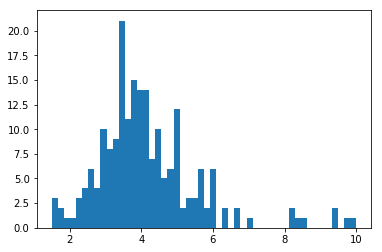

In [52]:
plt.hist(abundancy_ratios, bins=50)
